In [1]:
import pandas as pd

data_source = 'dbsetprm2.csv'

#data_source = 'pima-indians-diabetes.csv'

df = pd.read_csv(data_source, delimiter=";")

df

,"PROPERTY,BLOK,unit,NAMA BLOK,NOMOR,cust,price,status,year,month"
0,"1,a001,1,A,1,daisa,1.5,1,2023,Agustus"
1,"1,a004,1,A,4,sarmauli,1.5,0,2023,Oktober"
2,"1,a009,1,A,9,Katrim,1.5,1,2023,Maret"
3,"1,a014,1,A,14,noname,1.5,1,2023,Februari"
4,"1,a014,1,A,14,noname,1.5,0,2023,Januari"
...,...
196,"1,o019,1,O,19,Intan,1.5,0,2023,Juli"
197,"1,o020,1,O,20,Jihan,1.5,1,2023,November"
198,"1,o021,1,O,21,Kiki,1.5,1,2023,April"
199,"1,o022,1,O,22,Luki,1.5,1,2023,April"


In [2]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Load dataset dari file CSV
df = pd.read_csv('dbsetprm2.csv')

# Tampilkan beberapa baris pertama
df.head()


,PROPERTY,BLOK,unit,NAMA BLOK,NOMOR,cust,price,status,year,month
0,1,a001,1,A,1,daisa,1.5,1,2023,Agustus
1,1,a004,1,A,4,sarmauli,1.5,0,2023,Oktober
2,1,a009,1,A,9,Katrim,1.5,1,2023,Maret
3,1,a014,1,A,14,noname,1.5,1,2023,Februari
4,1,a014,1,A,14,noname,1.5,0,2023,Januari


In [3]:
# Inisialisasi LabelEncoder
label_encoder = LabelEncoder()

# Daftar kolom yang akan diencode
columns_to_encode = [ 'BLOK','unit','NAMA BLOK','cust','price','status','year','month']  # Ganti dengan nama kolom yang relevan

# Terapkan LabelEncoder pada setiap kolom
for column in columns_to_encode:
    df[column] = label_encoder.fit_transform(df[column])

# Tampilkan beberapa baris pertama setelah encoding
df.head()


,PROPERTY,BLOK,unit,NAMA BLOK,NOMOR,cust,price,status,year,month
0,1,0,0,0,1,111,0,1,0,0
1,1,1,0,0,4,148,0,0,0,10
2,1,2,0,0,9,51,0,1,0,7
3,1,3,0,0,14,137,0,1,0,3
4,1,3,0,0,14,137,0,0,0,4


In [4]:
df.info

<bound method DataFrame.info of      PROPERTY  BLOK  unit  NAMA BLOK  NOMOR  cust  price  status  year  month
0           1     0     0          0      1   111      0       1     0      0
1           1     1     0          0      4   148      0       0     0     10
2           1     2     0          0      9    51      0       1     0      7
3           1     3     0          0     14   137      0       1     0      3
4           1     3     0          0     14   137      0       0     0      4
..        ...   ...   ...        ...    ...   ...    ...     ...   ...    ...
196         1   193     0         12     19    46      0       0     0      5
197         1   194     0         12     20    47      0       1     0      9
198         1   195     0         12     21    52      0       1     0      1
199         1   196     0         12     22    56      0       1     0      1
200         1   197     0         12     23    64      0       1     0      6

[201 rows x 10 columns]>

In [5]:
df.isna().sum()

PROPERTY     0
BLOK         0
unit         0
NAMA BLOK    0
NOMOR        0
cust         0
price        0
status       0
year         0
month        0
dtype: int64

In [6]:
# Pilih kolom yang relevan untuk clustering
# Misalnya, jika dataset memiliki kolom 'feature1', 'feature2', 'feature3'
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Misalkan df adalah DataFrame yang sudah ada
features = ['PROPERTY','NAMA BLOK','unit','BLOK','status','month','price']
data = df[features]

# Encode kolom kategorikal
data = pd.get_dummies(data, columns=['NAMA BLOK', 'price'], drop_first=True)

# Standarisasi data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

# Tampilkan beberapa baris pertama dari data yang distandarisasi
print(scaled_data[:5])



[[ 0.          0.         -1.67882883  0.63686294 -1.58100847 -0.15971914
  -0.1424941  -0.12309149 -0.07071068 -0.41061497 -0.26296185 -0.36822985
  -0.41885391 -0.42702803 -0.29408585 -0.30395938 -0.35946277]
 [ 0.          0.         -1.66154083 -1.57019656  1.41129569 -0.15971914
  -0.1424941  -0.12309149 -0.07071068 -0.41061497 -0.26296185 -0.36822985
  -0.41885391 -0.42702803 -0.29408585 -0.30395938 -0.35946277]
 [ 0.          0.         -1.64425282  0.63686294  0.51360445 -0.15971914
  -0.1424941  -0.12309149 -0.07071068 -0.41061497 -0.26296185 -0.36822985
  -0.41885391 -0.42702803 -0.29408585 -0.30395938 -0.35946277]
 [ 0.          0.         -1.62696481  0.63686294 -0.68331722 -0.15971914
  -0.1424941  -0.12309149 -0.07071068 -0.41061497 -0.26296185 -0.36822985
  -0.41885391 -0.42702803 -0.29408585 -0.30395938 -0.35946277]
 [ 0.          0.         -1.62696481 -1.57019656 -0.3840868  -0.15971914
  -0.1424941  -0.12309149 -0.07071068 -0.41061497 -0.26296185 -0.36822985
  -0.418

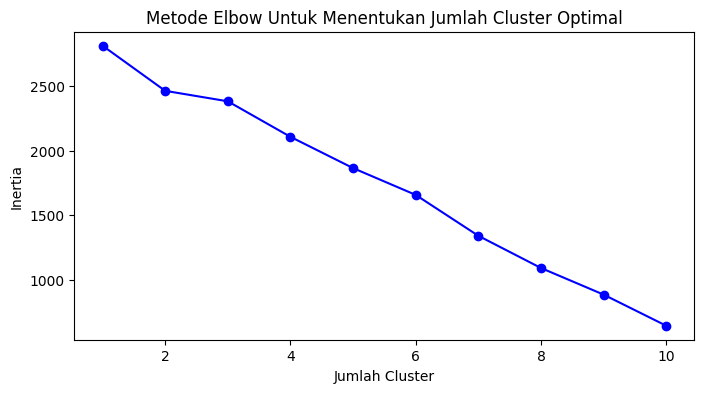

In [7]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Misalkan df adalah DataFrame yang sudah ada
features = ['NAMA BLOK','BLOK','unit','status','price','year']
data = df[features]

# Encode kolom kategorikal
data = pd.get_dummies(data, columns=['NAMA BLOK', 'price'], drop_first=True)

# Standarisasi data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

# Menentukan rentang jumlah cluster yang akan diuji
range_n_clusters = list(range(1, 11))

# Simpan nilai inertia untuk setiap jumlah cluster
inertia = []

for n_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)

# Plot metode elbow
plt.figure(figsize=(8, 4))
plt.plot(range_n_clusters, inertia, 'bo-')
plt.xlabel('Jumlah Cluster')
plt.ylabel('Inertia')
plt.title('Metode Elbow Untuk Menentukan Jumlah Cluster Optimal')
plt.show()


In [8]:
# Misalnya, dari elbow method kita menentukan jumlah cluster yang optimal adalah 3
optimal_clusters = 4

# Terapkan K-Means
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
kmeans.fit(scaled_data)

# Tambahkan hasil cluster ke dalam dataframe asli
df['Cluster'] = kmeans.labels_

# Tampilkan beberapa baris pertama
df.head()


,PROPERTY,BLOK,unit,NAMA BLOK,NOMOR,cust,price,status,year,month,Cluster
0,1,0,0,0,1,111,0,1,0,0,3
1,1,1,0,0,4,148,0,0,0,10,3
2,1,2,0,0,9,51,0,1,0,7,3
3,1,3,0,0,14,137,0,1,0,3,3
4,1,3,0,0,14,137,0,0,0,4,3


In [9]:
from sklearn.metrics import silhouette_score

# Misalkan y adalah label hasil clustering
y = df['Cluster']     # label hasil clustering

# Hitung Silhouette Score
print(f"Silhouette Score: {silhouette_score(scaled_data, y):.3f}")


Silhouette Score: 0.217


In [10]:
from sklearn.metrics import homogeneity_score, completeness_score, v_measure_score, adjusted_rand_score, adjusted_mutual_info_score, silhouette_score

# Misalkan x adalah label asli dan y adalah label hasil clustering
# Ganti x dan y dengan variabel yang sesuai
x = df['NAMA BLOK']  # label asli, ganti dengan variabel yang sesuai
y = df['Cluster']     # label hasil clustering

print(f"Homogeneity: {homogeneity_score(x, y):.3f}")
print(f"Completeness: {completeness_score(x, y):.3f}")
print(f"V-measure: {v_measure_score(x, y):.3f}")
print(f"Adjusted Rand Index: {adjusted_rand_score(x, y):.3f}")
print(f"Adjusted Mutual Information: {adjusted_mutual_info_score(x, y):.3f}")

# Jika Anda ingin menghitung silhouette score, Anda memerlukan data asli yang telah diskalakan dan label hasil clustering
print(f"Silhouette Score: {silhouette_score(scaled_data, y):.3f}")


Homogeneity: 0.413
Completeness: 1.000
V-measure: 0.584
Adjusted Rand Index: 0.231
Adjusted Mutual Information: 0.560
Silhouette Score: 0.217


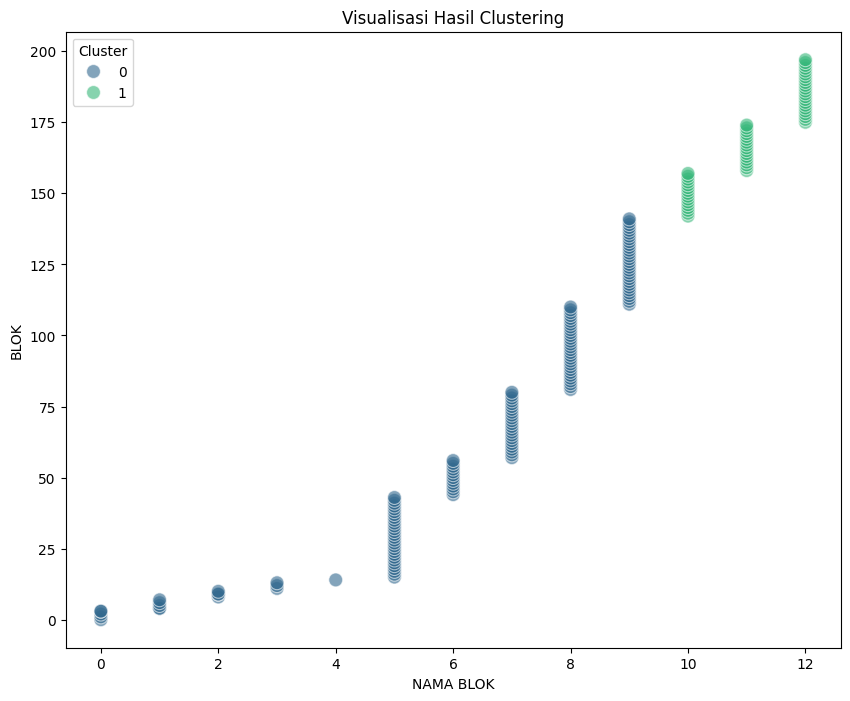

In [11]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# Misalkan df adalah DataFrame yang sudah ada
features = ['NAMA BLOK','BLOK','status','price','year']
data = df[features]

# Encode kolom kategorikal
data = pd.get_dummies(data, columns=['NAMA BLOK', 'price'], drop_first=True)

# Standarisasi data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

# Tentukan jumlah cluster optimal (misalkan 3)
n_clusters = 2
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
df['Cluster'] = kmeans.fit_predict(scaled_data)

# Visualisasi hasil clustering
plt.figure(figsize=(10, 8))
sns.scatterplot(x=df[features[0]], y=df[features[1]], hue=df['Cluster'], palette='viridis', s=100, alpha=0.6, edgecolor='w')
plt.title('Visualisasi Hasil Clustering')
plt.xlabel(features[0])
plt.ylabel(features[1])
plt.legend(title='Cluster')
plt.show()

Distribusi Cluster:
Cluster
0    145
1     56
Name: count, dtype: int64

Statistik Deskriptif per Cluster:
        PROPERTY                                      BLOK              ...  \
           count mean  std  min  25%  50%  75%  max  count        mean  ...   
Cluster                                                                 ...   
0          145.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0  145.0   69.151724  ...   
1           56.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0   56.0  169.500000  ...   

        year       month                                                 
         75%  max  count      mean       std  min  25%  50%   75%   max  
Cluster                                                                  
0        0.0  0.0  145.0  5.117241  3.198314  0.0  2.0  5.0  8.00  11.0  
1        0.0  0.0   56.0  5.714286  3.710988  0.0  2.0  5.0  9.25  11.0  

[2 rows x 80 columns]


C:\Users\dzulk\AppData\Local\Temp\ipykernel_14364\3398416274.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Cluster', data=df, palette='viridis')


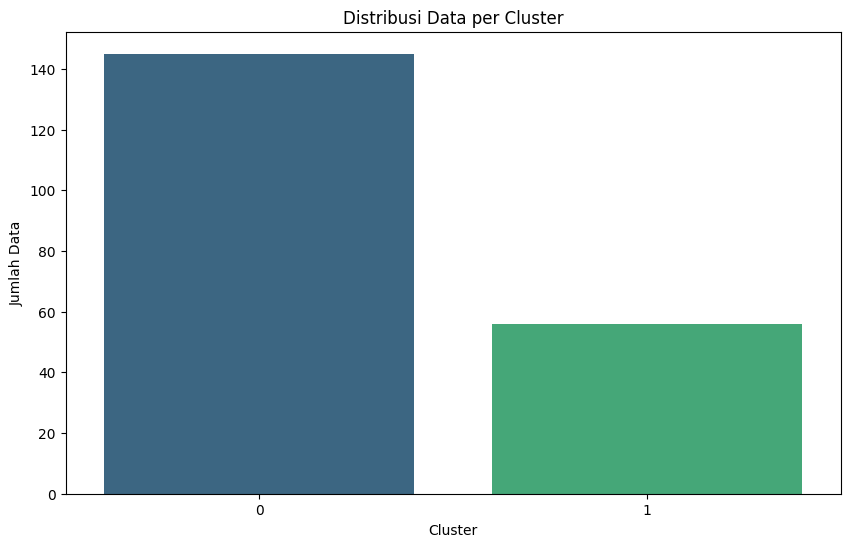

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

features = ['NAMA BLOK','BLOK','unit','status','price','year']
data = df[features]

data = pd.get_dummies(data, columns=['NAMA BLOK', 'price'], drop_first=True)

scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

n_clusters = 2
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
df['Cluster'] = kmeans.fit_predict(scaled_data)

cluster_counts = df['Cluster'].value_counts()
print("Distribusi Cluster:")
print(cluster_counts)

# Statistik deskriptif per cluster
cluster_summary = df.groupby('Cluster').describe()
print("\nStatistik Deskriptif per Cluster:")
print(cluster_summary)

# Visualisasi distribusi cluster
plt.figure(figsize=(10, 6))
sns.countplot(x='Cluster', data=df, palette='viridis')
plt.title('Distribusi Data per Cluster')
plt.xlabel('Cluster')
plt.ylabel('Jumlah Data')
plt.show()

C:\Users\dzulk\AppData\Local\Temp\ipykernel_14364\1359877765.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Cluster', data=df, palette='viridis')


Distribusi Cluster:
Cluster
0    145
1     56
Name: count, dtype: int64

Statistik Deskriptif per Cluster:
        PROPERTY                                      BLOK              ...  \
           count mean  std  min  25%  50%  75%  max  count        mean  ...   
Cluster                                                                 ...   
0          145.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0  145.0   69.151724  ...   
1           56.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0   56.0  169.500000  ...   

        year       month                                                 
         75%  max  count      mean       std  min  25%  50%   75%   max  
Cluster                                                                  
0        0.0  0.0  145.0  5.117241  3.198314  0.0  2.0  5.0  8.00  11.0  
1        0.0  0.0   56.0  5.714286  3.710988  0.0  2.0  5.0  9.25  11.0  

[2 rows x 80 columns]


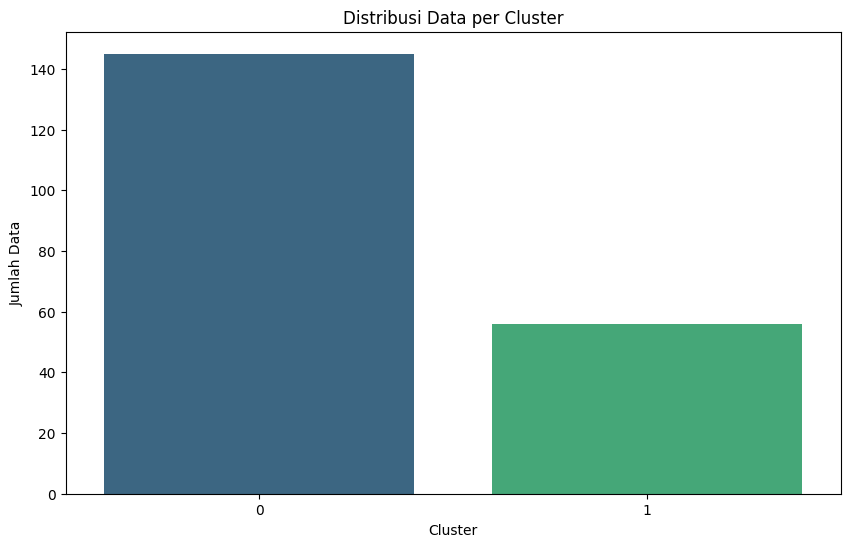

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Asumsi df sudah ada dan memiliki kolom-kolom yang dibutuhkan
features = ['NAMA BLOK','BLOK','unit','status','price','year']
data = df[features]

# Mengubah kolom kategorikal menjadi dummy
data = pd.get_dummies(data, columns=['NAMA BLOK', 'price'], drop_first=True)

# Standarisasi data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

# KMeans clustering
n_clusters = 2
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
df['Cluster'] = kmeans.fit_predict(scaled_data)

# Distribusi cluster
cluster_counts = df['Cluster'].value_counts()
print("Distribusi Cluster:")
print(cluster_counts)

# Statistik deskriptif per cluster
cluster_summary = df.groupby('Cluster').describe()
print("\nStatistik Deskriptif per Cluster:")
print(cluster_summary)

# Visualisasi distribusi cluster
plt.figure(figsize=(10, 6))
sns.countplot(x='Cluster', data=df, palette='viridis')
plt.title('Distribusi Data per Cluster')
plt.xlabel('Cluster')
plt.ylabel('Jumlah Data')
plt.show()

# Menyimpan hasil cluster ke dalam file CSV
df_cluster_0 = df[df['Cluster'] == 0]
df_cluster_1 = df[df['Cluster'] == 1]

df_cluster_0.to_csv('cluster_0.csv', index=False)
df_cluster_1.to_csv('cluster_1.csv', index=False)


In [14]:
# Simpan dataframe dengan kolom cluster ke file CSV
df.to_csv('hasil_clustering.csv', index=False)


In [15]:
from flask import Flask, render_template_string
import pandas as pd
from werkzeug.serving import run_simple

app = Flask(__name__)

@app.route('/')
def display_table():
    df = pd.read_csv('hasil_clustering.csv')
    cluster_0 = df[df['Cluster'] == 0]
    cluster_1 = df[df['Cluster'] == 1]
    table_html_all = df.to_html(classes='table table-striped table-sm', index=False)
    table_html_0 = cluster_0.to_html(classes='table table-striped table-sm', index=False)
    table_html_1 = cluster_1.to_html(classes='table table-striped table-sm', index=False)

    html = '''
    <!DOCTYPE html>
    <html lang="en">
    <head>
        <meta charset="UTF-8">
        <meta name="viewport" content="width=device-width, initial-scale=1.0">
        <title>Hasil Clustering</title>
        <link rel="stylesheet" href="https://stackpath.bootstrapcdn.com/bootstrap/4.5.2/css/bootstrap.min.css">
        <style>
            .table-container {
                max-height: 400px;
                overflow-y: auto;
                margin-bottom: 40px;
            }
            .container {
                margin-top: 20px;
            }
            h2 {
                margin-top: 20px;
            }
            img {
                max-width: 100%;
                height: auto;
                display: block;
                margin-left: auto;
                margin-right: auto;
                margin-bottom: 20px;
            }
        </style>
    </head>
    <body>
        <div class="container">
            <h1 class="mt-4">Hasil Clustering</h1>

            <div class="row mt-4">
                <div class="col-md-6">
                    <h2>Visualisasi Hasil Clustering</h2>
                    <img src="{{ url_for('static', filename='visualisasi2.png') }}" alt="Clustering Result">
                </div>
                <div class="col-md-6">
                    <h2>Metode Elbow</h2>
                    <img src="{{ url_for('static', filename='elbow.png') }}" alt="Elbow Method">
                </div>
            </div>

            <h2 class="mt-4">Semua Data</h2>
            <div class="table-container">
                {{ table_html_all | safe }}
            </div>

            <h2 class="mt-4">Cluster 0</h2>
            <div class="table-container">
                {{ table_html_0 | safe }}
            </div>

            <h2 class="mt-4">Cluster 1</h2>
            <div class="table-container">
                {{ table_html_1 | safe }}
            </div>
        </div>
    </body>
    </html>
    '''

    return render_template_string(html, table_html_all=table_html_all, table_html_0=table_html_0, table_html_1=table_html_1)

if __name__ == '__main__':
    run_simple('localhost', 5000, app)


 * Running on http://localhost:5000
Press CTRL+C to quit
127.0.0.1 - - [28/Jul/2024 21:04:23] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [28/Jul/2024 21:04:24] "GET /static/visualisasi2.png HTTP/1.1" 200 -
127.0.0.1 - - [28/Jul/2024 21:04:24] "GET /static/elbow.png HTTP/1.1" 304 -
